In [61]:
!python get_sequence_peaks.py

In [62]:
!python GC_match_background.py

/Users/adorman/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/adorman/Documents/master-thesis/src/GC_match_background.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_start = [int(x) for x in rand_start]


In [47]:
import pickle 
with open('../results/peaks_seq.pkl', 'rb') as file:
    peaks = pickle.load(file)

peaks

,chr,start,end,middle_peak,sequence
peaksID,,,,,
1:12768-13635,1,12768,13635,13202,AACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGAT...
1:14154-15100,1,14154,15100,14627,TGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGC...
1:15698-16677,1,15698,16677,16188,CAAGGCCACTGTGTTTCCCAGTTAGCTCAGAGCCTCAGTCGATCCC...
1:17116-17963,1,17116,17963,17540,ATATTTGAAATGGAAACTATTCAAAAAATTGAGAATTTCTGACCAC...
1:28903-29812,1,28903,29812,29358,CAATTATCTTTTGAAAAGCCTGTAGTTGCTCATCTGAAGAAGTGAC...
...,...,...,...,...,...
Y:56830668-56831266,Y,56830668,56831266,56830967,ACAATCTCAGCTCACATTTCATTTCACCATTCCATTCCATTCCACT...
Y:56833886-56834698,Y,56833886,56834698,56834292,CACTCCACTCCTTTCCATTCCATTCCACTCCACTCCATTCCACTCC...
Y:56836309-56837316,Y,56836309,56837316,56836812,TTTCACCATTTCATTCCATTCCATTCCACTGCATTCCATTCCATTC...


In [63]:
with open('../results/match_GC.pkl', 'rb') as file:
    peaks = pickle.load(file)

peaks

,chr,start,sequence
0,chr1,190585416.0,TGCCAGCATCTGTTATGTATTTTTGTCTTTTTAACACAATCGGAAA...
1,chr1,190681965.0,CAAAAAATTGCAACAGGCAGAGCTGTAAGAAGAATAAGTCAGTACA...
2,chr1,83253406.0,ATATCAATCTTTTTAATTTCTTAACACACTTGAAAAGTTTATGATA...
3,chr1,187975470.0,CTCCTTTGAATATATAATCATAAATGTGTCTTTTCCACATGACCTC...
4,chr1,232066673.0,AGATCTGGTGGCATGTGCCTGTAATCCCAGCTTCTCAGGAGGCTGA...
...,...,...,...
649,chr1,247116867.0,ACGGGGAGGGGGCGTGTCCCTGTGGGAGGGTGACAGCAAGGTCATC...
650,chr1,1211299.0,CCATGCCACAGGTGTGCAGCCCACAGTGCCGGTCGGAGACTCCCGT...
651,chr1,240091759.0,CGCGCGGGGGCAGAGGGGGCGGCGGCGGCGGGCGGGGAGCCAGGCC...
652,chr1,243849270.0,GCCAAACCCAGCATCTTCCGCACATTTCTATTCTTAGCACACAACT...


# Distribution peak length

953.1821498596458
3765
939.0
(1338,)


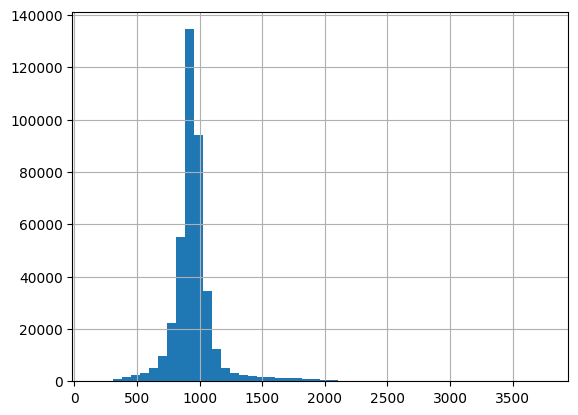

In [53]:
len_peak = peaks.end - peaks.start 
print(len_peak.mean())

len_peak.hist(bins=50)

print(len_peak.max())
print(len_peak.median())
print(len_peak[len_peak > 2000].shape)


# Distribution GC content

<Axes: >

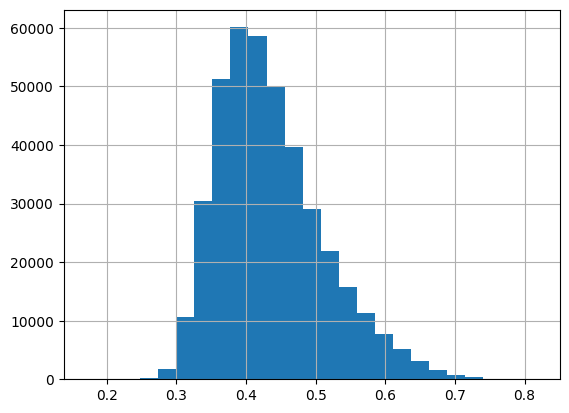

In [52]:
from utils_data_preprocessing import compute_GC_content

peaks['GC_cont'] = compute_GC_content(peaks.sequence)
peaks.GC_cont.hist(bins=25)

# Distribution coverage

In [54]:
coverage = []
with open("../results/coverage_by_pseudo_bulk.txt", "r") as grilled_cheese:
	coverage = grilled_cheese.read().splitlines()


In [56]:
import pandas as pd
import numpy as np

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

coverage = np.array(coverage)
cov_value = coverage[[is_float(x) for x in coverage]]
names = coverage[np.logical_not([is_float(x) for x in coverage])]

coverage = pd.DataFrame({"name": names[:-1], "coverage": cov_value})
coverage.name = coverage.name.str.removeprefix("../results/bam_cell_type/").str.removesuffix(".bam")
coverage

,name,coverage
0,D8_1/Neuroblast,0.00061318
1,D8_1/Somite,8.95754
2,D8_1/Neuronal,0.309335
3,D8_1/Myogenic,0.160304
4,D8_1/Mesenchymal,0.63683
5,D8_2/Somite,10.3794
6,D8_2/Neuronal,0.264931
7,D8_2/Myogenic,0.152165
8,D8_2/Mesenchymal,0.533022
9,D12_1/Neuroblast,0.202706


In [66]:
with open('../results/ATAC/D8_1/Somite.pkl', 'rb') as file:
    ATAC = pickle.load(file)

ATAC

peakID
1:12768-13635          [1.2189102178781874, 1.226369888734235, 1.2342...
1:14154-15100          [0.100332573013841, 0.10219749072785293, 0.104...
1:15698-16677          [3.221085875641379, 3.2192209579273667, 3.2173...
1:17116-17963          [2.92232605785667, 2.9100176009441916, 2.89770...
1:28903-29812          [21.48608996667407, 21.580827786545875, 21.688...
                                             ...                        
Y:56830668-56831266    [1.5490006532582963, 1.5508655709723083, 1.552...
Y:56833886-56834698    [3.907748577940566, 3.9017808412557278, 3.8954...
Y:56836309-56837316    [1.557579274742751, 1.564292978513194, 1.56988...
Y:56842040-56842368    [0.5173281738669051, 0.5184471244953123, 0.519...
Y:56850430-56851314    [1.466944273841772, 1.471793059898203, 1.47552...
Length: 399347, dtype: object

In [75]:
ATAC.sample(10)

peakID
X:10900704-10901627      [0.023870946739352507, 0.023870946739352507, 0...
1:156177651-156178551    [1.3684766185419428, 1.3699685527131524, 1.371...
5:19892885-19893802      [1.5221458381765245, 1.5217728546337224, 1.521...
8:18539400-18540385      [0.5053927004972288, 0.5024088321548097, 0.499...
6:2976342-2977342        [0.5930438330557888, 0.5949087507698008, 0.596...
8:63627552-63628475      [0.21073570168334632, 0.21260061939735825, 0.2...
2:96762496-96763437      [1.5363192128030152, 1.5404220317738415, 1.544...
2:233816312-233817346    [0.288316278586242, 0.2913001469286611, 0.2942...
1:85311495-85312556      [0.39760045662734017, 0.401330292055364, 0.405...
17:82450324-82451250     [4.000248496555557, 4.018897673695676, 4.03754...
dtype: object

In [69]:
!python GC_bins_genome.py

/Users/adorman/Documents/master-thesis/src/GC_bins_genome.py:48: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  back_regions = pd.read_csv("../results/background_regions.bed", sep='\t', header=None)


In [66]:
!bedtools intersect -a ../results/background_regions.bed -b ../results/common_peaks.bed -v > ../results/background_regions2.bed

In [67]:
!bedtools intersect -a ../results/background_regions2.bed -b ../data/hg38_blacklist.bed -v > ../results/background_regions.bed

In [70]:
with open('../results/background_GC.pkl', 'rb') as file:
    back = pickle.load(file)
back

,chr,start,end,sequence,GC_cont
ID,,,,,
1:18000-20114,1,18000,20114,TGAAGATGGAGCCATATTCCTGCAGGCGCCCTGGAGCAGGGTACTT...,0.577578
1:19000-21114,1,19000,21114,TGCATCTCATGGAACGCCATTTCCCCAGACATCCCTGTGGCTGGCT...,0.539262
1:20000-22114,1,20000,22114,CCTGGTGCTCCCACAAAGGAGAAGGGCTGATCACTCAAAGTTGCGA...,0.542573
1:21000-23114,1,21000,23114,CCGGGCTGTGCTGGGGCCTGAGCCGGGTGGTGGGGAGAGAGTCTCT...,0.560076
1:22000-24114,1,22000,24114,TTCCCTTGGGGAATCCATCTCTCTCGCAGGCTTAGTCCCAGAGCTT...,0.525071
...,...,...,...,...,...
Y:57211000-57213114,Y,57211000,57213114,GCCATAGTGAAGCTTTCCTCTCTAAGCTCACCCAGCCCAAACTGTG...,0.584674
Y:57212000-57214114,Y,57212000,57214114,GGAACCAGCACTGTGTGGAGACCAGCTTCAAGGAGCGGAAGGCTGG...,0.578051
Y:57213000-57215114,Y,57213000,57215114,TGTAGCAGGATCCCTGCAGATCAGGCCCATGACAAACACCGTCTCC...,0.546831


# Dataset class

In [13]:
import glob
import pickle
import pandas as pd

pkl_files = glob.glob('../results/ATAC/*/*.pkl')

with open(pkl_files[0], 'rb') as file:
    ATAC = pd.DataFrame(pickle.load(file))

ATAC['time'] = [pkl_files[0].split('/')[3]] * ATAC.shape[0]
ATAC['cell_type'] = [pkl_files[0].split('/')[4].removesuffix('.pkl')] * ATAC.shape[0]

for f in pkl_files[1:]:
    with open(f, 'rb') as file:
        tmp = pd.DataFrame(pickle.load(file))
    
    tmp['time'] = [f.split('/')[3]] * ATAC.shape[0]
    tmp['cell_type'] = [f.split('/')[4].removesuffix('.pkl')] * ATAC.shape[0]

    ATAC = pd.concat([ATAC, tmp])

ATAC

with open('../results/ATAC_peaks.pkl', 'wb') as file:
            pickle.dump(ATAC, file)

In [2]:
import pickle

with open('../results/background_GC.pkl', 'rb') as file:
    back = pickle.load(file).sequence

back

ID
1:18000-20114          TGAAGATGGAGCCATATTCCTGCAGGCGCCCTGGAGCAGGGTACTT...
1:19000-21114          TGCATCTCATGGAACGCCATTTCCCCAGACATCCCTGTGGCTGGCT...
1:20000-22114          CCTGGTGCTCCCACAAAGGAGAAGGGCTGATCACTCAAAGTTGCGA...
1:21000-23114          CCGGGCTGTGCTGGGGCCTGAGCCGGGTGGTGGGGAGAGAGTCTCT...
1:22000-24114          TTCCCTTGGGGAATCCATCTCTCTCGCAGGCTTAGTCCCAGAGCTT...
                                             ...                        
Y:57211000-57213114    GCCATAGTGAAGCTTTCCTCTCTAAGCTCACCCAGCCCAAACTGTG...
Y:57212000-57214114    GGAACCAGCACTGTGTGGAGACCAGCTTCAAGGAGCGGAAGGCTGG...
Y:57213000-57215114    TGTAGCAGGATCCCTGCAGATCAGGCCCATGACAAACACCGTCTCC...
Y:57214000-57216114    CACATCACCAGCTGCTCCGTTCTACCATTTCTTCAGCCCTCTTGGC...
Y:57215000-57217114    TGGTAATCAGTTAACAAATTAAACATATTTATTTTATACTTTTAAA...
Name: sequence, Length: 1928785, dtype: object

In [11]:
from utils_data_preprocessing import one_hot_encode

test = back[:1000].copy()
test = test.apply(lambda x: one_hot_encode(x))

In [12]:
encod

ID
1:18000-20114        [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [...
1:19000-21114        [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [...
1:20000-22114        [[0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...
1:21000-23114        [[0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...
1:22000-24114        [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [...
                                           ...                        
1:1791000-1793114    [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [...
1:1792000-1794114    [[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...
1:1793000-1795114    [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [...
1:1794000-1796114    [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [...
1:1795000-1797114    [[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...
Name: sequence, Length: 1000, dtype: object

In [ ]:
from torch.utils.data import Dataset, DataLoader

def one_hot_encode(seq):
    mapping = dict(zip("ACGT", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

class BiasDataset(Dataset):
    """Background sequences for bias model training"""

    def __init__(self, path_sequences, path_ATAC_signal):
        """
        Arguments:
            path_sequences (string): Path to the pickle file with background regions sequences
            path_ATAC_signal (string): Path to the pickle file with ATAC tracks per datasets and time points

        """
        with open(path_sequences, 'rb') as file:
            self.sequences = pickle.load(file).sequence

        #Encode sequences
        self.sequences = self.sequences.apply(lambda x: one_hot_encode(x))
        
        with open(path_ATAC_signal, 'rb') as file:
            self.ATAC_track = pickle.load(file).sequence
            self.ATAC_track.time = self.ATAC_track.time.astype('category')
            self.ATAC_track.cell_type = self.ATAC_track.cell_type.astype('category')

    def __len__(self):
        return self.ATAC_track.shape[0]

    def __getitem__(self, idx):
        
        track = self.ATAC_track.iloc[idx,0]
        time = self.ATAC_track.iloc[idx,:].time
        cell_type = self.ATAC_track.iloc[idx,:].cell_type

        input = self.sequences[self.ATAC_track.index[idx]]

        return input, time, cell_type, track


In [ ]:
dataset = BiasDataset('../results/common_peaks.pkl', '../results/ATAC_peaks.pkl')


In [15]:
import torch

torch.nn.functional.one_hot(torch.arange(0, 5) % 3).dtype

torch.int64

In [24]:
import pickle
import pandas as pd
from utils_data_preprocessing import compute_GC_content

with open('../results/background_GC_matched.pkl', 'rb') as file:
    back = pd.DataFrame(pickle.load(file))

back['GC_cont'] = compute_GC_content(back.sequence)
back

,chr,start,end,sequence,GC_cont
GC_cont,,,,,
1:12768-13635,10,133024000,133026114,GGGGTCTTCTAGCTCCTGCTCCTTCCAGCCCCGGGGTCTTCGAGCT...,0.582781
1:14154-15100,11,1118000,1120114,GATCATGAGGTCAGACCATGAGGTGGGATCAGAAGACCAATACCCC...,0.586566
1:15698-16677,8,144493000,144495114,GAAGATGGGGTGATGGCAGGTGCCTGAGGCAGTGATGGGAGTAGAG...,0.586093
1:17116-17963,19,1871000,1873114,AAAGAAAAAAGAAAGATCCGTAAGGAAAGAGTGCACAGGGTTGTGC...,0.607852
1:28903-29812,11,882000,884114,CTCAAAAAAAAAAAAAAAAAAGAAAACAGAGAAAAAAGAATCCCAG...,0.573321
...,...,...,...,...,...
Y:56830668-56831266,X,66718000,66720114,TGTAAGAGTTAAGGGATAAGCAGGAATCAAGAATTACAGTCACGTT...,0.471145
Y:56833886-56834698,9,133278000,133280114,ACTTCCGCCTTAGTTTCCTCCCAATACTCACCTTGCCGGTTTCCCA...,0.470199
Y:56836309-56837316,X,39061000,39063114,AGAACCAATCGGGAAAGAGTGGGCAAACAGGAATAGAAGTTCTCAC...,0.475402


In [26]:
with open('../results/peaks_seq.pkl', 'rb') as file:
    peaks = pickle.load(file)

peaks['GC_cont'] = compute_GC_content(peaks.sequence)
peaks

,chr,start,end,middle_peak,sequence,GC_cont
peakID,,,,,,
1:12768-13635,1,12768,13635,13202,AACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGAT...,0.582308
1:14154-15100,1,14154,15100,14627,TGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGC...,0.585620
1:15698-16677,1,15698,16677,16188,CAAGGCCACTGTGTTTCCCAGTTAGCTCAGAGCCTCAGTCGATCCC...,0.592242
1:17116-17963,1,17116,17963,17540,ATATTTGAAATGGAAACTATTCAAAAAATTGAGAATTTCTGACCAC...,0.608325
1:28903-29812,1,28903,29812,29358,CAATTATCTTTTGAAAAGCCTGTAGTTGCTCATCTGAAGAAGTGAC...,0.572375
...,...,...,...,...,...,...
Y:56830668-56831266,Y,56830668,56831266,56830967,ACAATCTCAGCTCACATTTCATTTCACCATTCCATTCCATTCCACT...,0.468307
Y:56833886-56834698,Y,56833886,56834698,56834292,CACTCCACTCCTTTCCATTCCATTCCACTCCACTCCATTCCACTCC...,0.467833
Y:56836309-56837316,Y,56836309,56837316,56836812,TTTCACCATTTCATTCCATTCCATTCCACTGCATTCCATTCCATTC...,0.475875


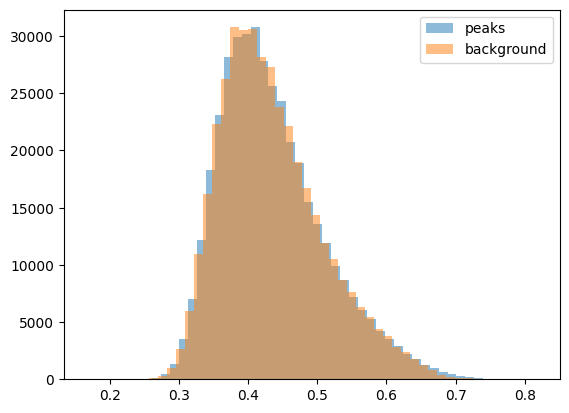

In [28]:
import matplotlib.pyplot as plt

plt.hist(peaks.GC_cont, bins=50, alpha=0.5, label='peaks')
plt.hist(back.GC_cont, bins=50, alpha=0.5, label='background')
plt.legend(loc='upper right')
plt.show()

In [31]:
back[['chr','start','end']].to_csv("../results/check_back.bed", sep='\t', index=False, header=None)

# Number of cell per datasets

In [47]:
import anndata
adata = anndata.read_h5ad('../results/concat.h5ad')
adata

AnnData object with n_obs × n_vars = 95239 × 1742749
    obs: 'batch', 'cell_type'

In [54]:
count_cell_type = adata.obs.groupby(['batch', 'cell_type']).size()
count_cell_type

/var/folders/nx/fx90wvl146lcdkglfty5_wr4qnvn43/T/ipykernel_33372/500283141.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_cell_type = adata.obs.groupby(['batch', 'cell_type']).size()


batch  cell_type          
D8_1   Immature neuron            0
       Mesenchymal              646
       Myogenic progenitor      178
       Neuroblast                 1
       Neuronal progenitor      300
       Somite                 10612
D8_2   Immature neuron            0
       Mesenchymal              767
       Myogenic progenitor      238
       Neuroblast                 0
       Neuronal progenitor      346
       Somite                 16274
D12_1  Immature neuron          253
       Mesenchymal             5610
       Myogenic progenitor     1802
       Neuroblast               396
       Neuronal progenitor     5259
       Somite                  2376
D12_2  Immature neuron          232
       Mesenchymal             4921
       Myogenic progenitor     1672
       Neuroblast               321
       Neuronal progenitor     4185
       Somite                  2026
D20_1  Immature neuron         1840
       Mesenchymal             3074
       Myogenic progenitor     1291
 

In [33]:
#Create common peak set across time point and replicates
#Assume that peak in each replicate are non-overlapping
#--------------------------------------------
import os
import subprocess
import numpy as np
import pandas as pd

TIME_POINT = ["D8", "D12", "D20", "D22-15"]
data_path = '../../../../../../projects/schuelke-cubi-muscle-dev/work/BtE_P07_P08_analyses/MULTIOME/outputs/'
data_path = '../../data/test/'

#Load peaks per time point, only keep the one that were in both replicates
peaks_per_rep = []
for t in TIME_POINT:
    peaks_rep1, peaks_rep2 = data_path + t + "_REP1_run1/outs/atac_peaks.bed", data_path + t + "_REP2_run1/outs/atac_peaks.bed"
    peaks_rep1, peaks_rep2 =  pd.read_csv(peaks_rep1 ,header=None, sep='\t', skiprows=range(0, 50)), pd.read_csv(peaks_rep2 ,header=None, sep='\t', skiprows=range(0, 50))
    
    #Remove scaffold chromosomes
    peaks_rep1 = peaks_rep1[np.logical_or(np.logical_or(peaks_rep1[0].str.isnumeric(), peaks_rep1[0] == 'X'), peaks_rep1[0] == 'Y')]
    peaks_rep2 = peaks_rep2[np.logical_or(np.logical_or(peaks_rep2[0].str.isnumeric(), peaks_rep2[0] == 'X'), peaks_rep2[0] == 'Y')]

    #Merge overlapping peaks
    if not os.path.exists('../../results/tmp/'):
        os.makedirs('../../results/tmp/')

    peaks = pd.concat([peaks_rep1, peaks_rep2])
    peaks_path = "../../results/tmp/peaks.bed"
    peaks.to_csv(peaks_path, header=False, index=False, sep='\t')
    
    sort_bed = "sortBed -i " + peaks_path + " > ../../results/tmp/peaks_sorted.bed"
    subprocess.run(sort_bed, shell=True)

    merge_bedtools = "bedtools merge -i ../../results/tmp/peaks_sorted.bed -c 1 -o count > ../../results/tmp/count_peaks.bed"
    subprocess.run(merge_bedtools, shell=True)
    
    #Only keep peaks that were in both replicates
    peaks = pd.read_csv("../../results/tmp/count_peaks.bed" ,header=None, sep='\t')
    peaks = peaks[peaks[3] == 2]

    peaks_per_rep.append(peaks.iloc[:,0:3])

#Take union of peaks of all time points and merge overlapping peaks 
peaks = pd.concat(peaks_per_rep)
peaks.to_csv("../../results/tmp/all_peaks.bed", header=False, index=False, sep='\t')

sort_bed = "sortBed -i ../../results/tmp/all_peaks.bed > ../../results/tmp/all_peaks_sorted.bed"
subprocess.run(sort_bed, shell=True)

merge_bedtools = "bedtools merge -i ../../results/tmp/all_peaks_sorted.bed > ../../results/common_peaks.bed"
subprocess.run(merge_bedtools, shell=True)

/var/folders/nx/fx90wvl146lcdkglfty5_wr4qnvn43/T/ipykernel_52999/3650784048.py:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  peaks = pd.read_csv("../../results/tmp/count_peaks.bed" ,header=None, sep='\t')


(244587, 4)
(181675, 4)
        0         1         2
0       1      9775     10680
1       1     28909     29812
5       1    180637    181501
7       1    186111    186914
8       1    191145    192012
...    ..       ...       ...
244581  Y  56724353  56725266
244582  Y  56727619  56728555
244583  Y  56763067  56763971
244584  Y  56829173  56830024
244586  Y  56836347  56837275

[181675 rows x 3 columns]


FileNotFoundError: [Errno 2] No such file or directory: '../../data/test/D12_REP1_run1/outs/atac_peaks.bed'